In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# CSV 파일 경로 지정
file_path = '/content/drive/MyDrive/BOAZ_미니프로젝트1/Code정리/Phase1/result/train_NCF.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())

   사용자ID  영화ID  rating
0   5070  1270       1
1   5070   678       0
2   5070  3056       0
3   5070  1411       0
4   5070   436       0


In [ ]:
import pandas as pd

# CSV 파일 경로 지정
file_path = '/content/drive/MyDrive/BOAZ_미니프로젝트1/Code정리/Phase1/result/test_NCF.csv'

# CSV 파일 읽기
df2 = pd.read_csv(file_path)

# 데이터 확인
df2

In [4]:
df2.rename(columns={'사용자ID': 'user_id',"영화ID":"movie_id"}, inplace=True)
df.rename(columns={'사용자ID': 'user_id',"영화ID":"movie_id"}, inplace=True)

In [6]:
import time
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tensorboardX import SummaryWriter

## **Mapping user and movie ids index to use in pytorch**

In [7]:
# ────────────────────────────────────────────── #
# 1. 전체 데이터(학습 + 테스트)를 기반으로 사용자/아이템 매핑 생성
# ────────────────────────────────────────────── #
import pandas as pd

# 두 데이터의 ID를 모두 포함하여 고유값 추출
all_user_ids = pd.concat([df['user_id'], df2['user_id']]).unique()
all_movie_ids = pd.concat([df['movie_id'], df2['movie_id']]).unique()

user_id_map = {id_: idx for idx, id_ in enumerate(all_user_ids)}
movie_id_map = {id_: idx for idx, id_ in enumerate(all_movie_ids)}

In [8]:
# 매핑 적용
df['user_id'] = df['user_id'].map(user_id_map)
df['movie_id'] = df['movie_id'].map(movie_id_map)

df2['user_id'] = df2['user_id'].map(user_id_map)
df2['movie_id'] = df2['movie_id'].map(movie_id_map)

# ────────────────────────────────────────────── #
# 2. 사용자/아이템 개수 설정 (매핑된 길이 사용)
# ────────────────────────────────────────────── #
num_users = len(user_id_map)
num_items = len(movie_id_map)

inv_user_id_map = {v: k for k, v in user_id_map.items()}
inv_movie_id_map = {v: k for k, v in movie_id_map.items()}

# device 설정
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## **First NCF Model**

Epoch 1: 100%|██████████| 6879/6879 [01:18<00:00, 87.54it/s] 


[Epoch 1] Loss: 0.4012 | HR@10: 0.3244, NDCG@10: 0.1685 | Elapsed: 00:01:41


Epoch 2: 100%|██████████| 6879/6879 [01:12<00:00, 95.25it/s] 


[Epoch 2] Loss: 0.3824 | HR@10: 0.3576, NDCG@10: 0.1870 | Elapsed: 00:01:35


Epoch 3: 100%|██████████| 6879/6879 [01:13<00:00, 93.87it/s] 


[Epoch 3] Loss: 0.3666 | HR@10: 0.3720, NDCG@10: 0.1924 | Elapsed: 00:01:36


Epoch 4: 100%|██████████| 6879/6879 [01:08<00:00, 100.20it/s]


[Epoch 4] Loss: 0.3560 | HR@10: 0.3928, NDCG@10: 0.2008 | Elapsed: 00:01:29


Epoch 5: 100%|██████████| 6879/6879 [01:08<00:00, 100.56it/s]


[Epoch 5] Loss: 0.3463 | HR@10: 0.4113, NDCG@10: 0.2136 | Elapsed: 00:01:29


Epoch 6: 100%|██████████| 6879/6879 [01:09<00:00, 99.66it/s] 


[Epoch 6] Loss: 0.3368 | HR@10: 0.4314, NDCG@10: 0.2223 | Elapsed: 00:01:32


Epoch 7: 100%|██████████| 6879/6879 [01:12<00:00, 95.19it/s]


[Epoch 7] Loss: 0.3309 | HR@10: 0.4530, NDCG@10: 0.2329 | Elapsed: 00:01:35


Epoch 8: 100%|██████████| 6879/6879 [01:12<00:00, 94.64it/s]


[Epoch 8] Loss: 0.3269 | HR@10: 0.4429, NDCG@10: 0.2316 | Elapsed: 00:01:36


Epoch 9: 100%|██████████| 6879/6879 [01:13<00:00, 93.77it/s] 


[Epoch 9] Loss: 0.3237 | HR@10: 0.4612, NDCG@10: 0.2365 | Elapsed: 00:01:37


Epoch 10: 100%|██████████| 6879/6879 [01:21<00:00, 84.44it/s]


[Epoch 10] Loss: 0.3210 | HR@10: 0.4533, NDCG@10: 0.2360 | Elapsed: 00:01:47


Epoch 11: 100%|██████████| 6879/6879 [01:25<00:00, 80.85it/s]


[Epoch 11] Loss: 0.3188 | HR@10: 0.4591, NDCG@10: 0.2377 | Elapsed: 00:01:50


Epoch 12: 100%|██████████| 6879/6879 [01:23<00:00, 82.25it/s]


[Epoch 12] Loss: 0.3169 | HR@10: 0.4569, NDCG@10: 0.2379 | Elapsed: 00:01:49


Epoch 13: 100%|██████████| 6879/6879 [01:21<00:00, 84.92it/s]


[Epoch 13] Loss: 0.3151 | HR@10: 0.4567, NDCG@10: 0.2375 | Elapsed: 00:01:46


Epoch 14: 100%|██████████| 6879/6879 [01:06<00:00, 103.82it/s]


[Epoch 14] Loss: 0.3139 | HR@10: 0.4582, NDCG@10: 0.2372 | Elapsed: 00:01:26


Epoch 15: 100%|██████████| 6879/6879 [01:03<00:00, 108.44it/s]


[Epoch 15] Loss: 0.3126 | HR@10: 0.4542, NDCG@10: 0.2380 | Elapsed: 00:01:24


Epoch 16: 100%|██████████| 6879/6879 [01:04<00:00, 107.12it/s]


[Epoch 16] Loss: 0.3114 | HR@10: 0.4616, NDCG@10: 0.2429 | Elapsed: 00:01:24


Epoch 17: 100%|██████████| 6879/6879 [01:04<00:00, 107.15it/s]


[Epoch 17] Loss: 0.3105 | HR@10: 0.4634, NDCG@10: 0.2402 | Elapsed: 00:01:23


Epoch 18: 100%|██████████| 6879/6879 [01:03<00:00, 108.88it/s]


[Epoch 18] Loss: 0.3096 | HR@10: 0.4628, NDCG@10: 0.2404 | Elapsed: 00:01:22


Epoch 19: 100%|██████████| 6879/6879 [01:13<00:00, 93.18it/s]


[Epoch 19] Loss: 0.3088 | HR@10: 0.4670, NDCG@10: 0.2403 | Elapsed: 00:01:34


Epoch 20: 100%|██████████| 6879/6879 [01:10<00:00, 97.50it/s]


[Epoch 20] Loss: 0.3082 | HR@10: 0.4598, NDCG@10: 0.2383 | Elapsed: 00:01:32
Training complete. Best epoch = 19 | HR = 0.4670, NDCG = 0.2403


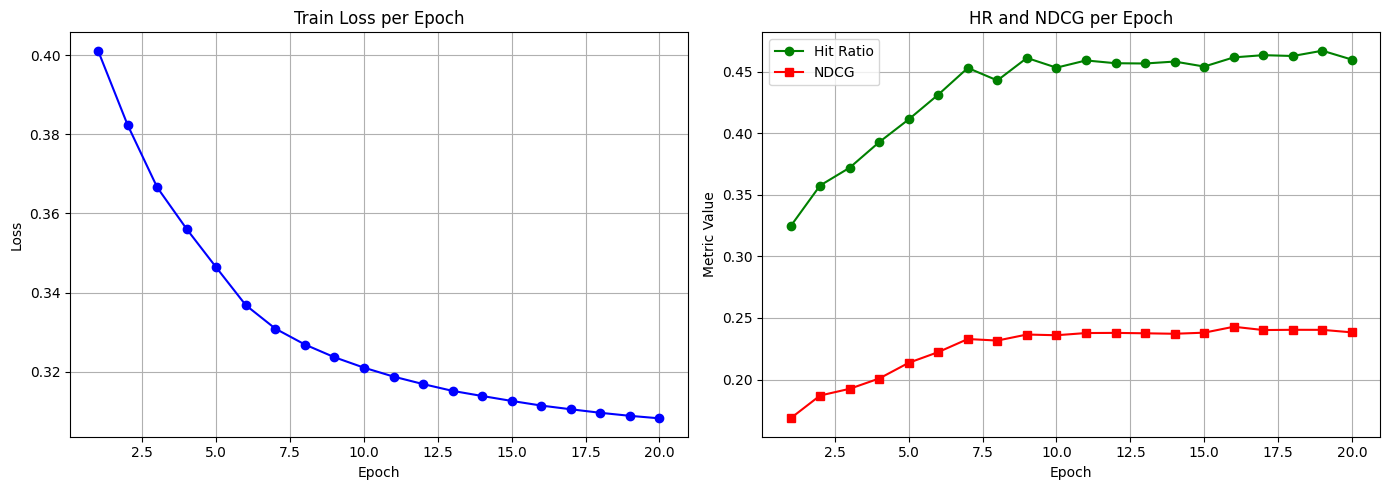

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tensorboardX import SummaryWriter
from tqdm import tqdm
import time


################################################################################
# 3. PyTorch Dataset
################################################################################
class RatingDataset(Dataset):
    def __init__(self, dataframe):
        self.user = dataframe['user_id'].values
        self.item = dataframe['movie_id'].values
        self.label = dataframe['rating'].values

    def __len__(self):
        return len(self.user)

    def __getitem__(self, idx):
        u = torch.tensor(self.user[idx], dtype=torch.long)
        i = torch.tensor(self.item[idx], dtype=torch.long)
        l = torch.tensor(self.label[idx], dtype=torch.float32)  # BCELoss 위해 float
        return u, i, l

# 학습 / 테스트용 Dataset & DataLoader
train_dataset = RatingDataset(df)
test_dataset = RatingDataset(df2)

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False)
# 위 test_dataloader는 여기 예시 코드상 사용하지 않지만, 필요하다면 활용 가능

################################################################################
# 4. NCF 모델 정의
################################################################################
class NCF(nn.Module):
    def __init__(self, num_users, num_items, embed_dim=16):
        super(NCF, self).__init__()
        self.embed_dim = embed_dim
        self.dropout = nn.Dropout(p=0.1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        # Embedding
        self.embedding_user = nn.Embedding(num_embeddings=num_users, embedding_dim=self.embed_dim)
        self.embedding_item = nn.Embedding(num_embeddings=num_items, embedding_dim=self.embed_dim)

        # MLP layers
        self.fc1 = nn.Linear(self.embed_dim*2, 16)
        self.fc2 = nn.Linear(16, 4)
        self.fc3 = nn.Linear(4, 1)

        self.apply(self._init_weights)

    def forward(self, user_indices, item_indices):
        user_embedding = self.embedding_user(user_indices)
        item_embedding = self.embedding_item(item_indices)
        vector = torch.cat([user_embedding, item_embedding], dim=-1)

        x = self.fc1(vector)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)
        out = self.sigmoid(x)
        return out.squeeze()

    def _init_weights(self, module):
        if isinstance(module, nn.Linear) or isinstance(module, nn.Embedding):
            nn.init.xavier_uniform_(module.weight)
            if isinstance(module, nn.Linear) and module.bias is not None:
                nn.init.zeros_(module.bias)

################################################################################
# 5. 학습 설정
################################################################################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NCF(num_users, num_items, embed_dim=8).to(device)

learning_rate = 0.0005
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

################################################################################
# 6. Negative Sampling & 평가 지표(HR, NDCG)
################################################################################
def get_negative_samples(user_id, all_item_ids, seen_item_ids, num_neg=99):
    """사용자가 본 적 없는 아이템 중 num_neg개 추출"""
    candidates = list(set(all_item_ids) - set(seen_item_ids))
    if len(candidates) < num_neg:
        # 후보가 부족하면 가능한 만큼만 뽑거나, 필요 시 skip할 수도 있음
        num_neg = len(candidates)
    if num_neg == 0:
        return []
    return np.random.choice(candidates, num_neg, replace=False)

def hit(gt_item, pred_items):
    return 1 if gt_item in pred_items else 0

def ndcg(gt_item, pred_items):
    """pred_items 내에서 gt_item의 순위가 얼마나 높은지"""
    if gt_item in pred_items:
        index = pred_items.index(gt_item)
        return 1 / np.log2(index + 2)
    return 0

def metrics(model, test_data, all_item_ids, top_k=10):
    """ test_data를 순회하며 HR@K, NDCG@K 계산 """
    model.eval()
    HR_list, NDCG_list = [], []

    # -1인 (미존재) 유저나 아이템 제외
    valid_test = test_data[(test_data['user_id'] >= 0) & (test_data['movie_id'] >= 0)]

    with torch.no_grad():
        for row in valid_test.itertuples():
            user_id = row.user_id
            gt_item = row.movie_id

            # 사용자가 train에서 이미 본 아이템 목록
            seen_item_ids = df[df['user_id'] == user_id]['movie_id'].unique().tolist()

            # Negative 샘플 99개 추출
            neg_samples = get_negative_samples(
                user_id,
                all_item_ids,
                seen_item_ids,
                num_neg=99
            )
            # 만약 neg_samples가 비어있다면 스킵
            if len(neg_samples) == 0:
                continue

            items_to_eval = [gt_item] + list(neg_samples)

            # 모델 예측
            user_tensor = torch.tensor([user_id]*len(items_to_eval), dtype=torch.long).to(device)
            item_tensor = torch.tensor(items_to_eval, dtype=torch.long).to(device)
            scores = model(user_tensor, item_tensor).cpu().numpy()

            # 스코어 내림차순 정렬
            sort_indices = np.argsort(-scores)
            ranked_items = [items_to_eval[i] for i in sort_indices]

            # 상위 K개 안에 ground truth가 있는지
            HR_list.append(hit(gt_item, ranked_items[:top_k]))
            # NDCG는 전체 순위에서의 위치로 계산 (원하는 경우 top_k 내에서만 계산 가능)
            NDCG_list.append(ndcg(gt_item, ranked_items[:top_k]))

    hr = np.mean(HR_list) if len(HR_list) > 0 else 0
    ndcg_val = np.mean(NDCG_list) if len(NDCG_list) > 0 else 0
    return hr, ndcg_val

################################################################################
# 7. 학습 루프 + 텐서보드 기록 (예시)
################################################################################
writer = SummaryWriter()
all_item_ids = df['movie_id'].unique()
top_k = 10
best_hr = 0

import matplotlib.pyplot as plt

# 에포크마다 기록할 리스트 초기화
loss_history = []
hr_history = []
ndcg_history = []

best_hr = 0

for epoch in range(20):
    model.train()
    start_time = time.time()
    total_loss = 0

    for user, item, label in tqdm(train_dataloader, desc=f"Epoch {epoch+1}"):
        user = user.to(device)
        item = item.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        preds = model(user, item)
        loss = loss_fn(preds, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # 에포크마다 평균 loss 계산 및 기록
    avg_loss = total_loss / len(train_dataloader)
    loss_history.append(avg_loss)

    # 한 에포크 끝나면 평가
    hr, ndcg_val = metrics(model, df2, all_item_ids, top_k=top_k)
    hr_history.append(hr)
    ndcg_history.append(ndcg_val)

    epoch_time = time.time() - start_time

    # 텐서보드 기록 (원하는 경우)
    writer.add_scalar("Loss/train", avg_loss, epoch)
    writer.add_scalar("HR/test", hr, epoch)
    writer.add_scalar("NDCG/test", ndcg_val, epoch)

    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f} | "
          f"HR@{top_k}: {hr:.4f}, NDCG@{top_k}: {ndcg_val:.4f} | "
          f"Elapsed: {time.strftime('%H:%M:%S', time.gmtime(epoch_time))}")

    # 베스트 모델 갱신
    if hr > best_hr:
        best_hr = hr
        best_ndcg = ndcg_val
        best_epoch = epoch

writer.close()
print(f"Training complete. Best epoch = {best_epoch+1} | HR = {best_hr:.4f}, NDCG = {best_ndcg:.4f}")

# 시각화
epochs = range(1, len(loss_history) + 1)

plt.figure(figsize=(14, 5))

# 1) Train Loss 그래프 (왼쪽)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_history, marker='o', color='blue')
plt.title("Train Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# 2) HR & NDCG 그래프 (오른쪽)
plt.subplot(1, 2, 2)
plt.plot(epochs, hr_history, marker='o', label="Hit Ratio", color='green')
plt.plot(epochs, ndcg_history, marker='s', label="NDCG", color='red')
plt.title("HR and NDCG per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# ────────────────────────────────────────────── #
# 8. Inverse Mapping (원래 ID 복원)
# ────────────────────────────────────────────── #
inv_user_id_map = {v: k for k, v in user_id_map.items()}
inv_movie_id_map = {v: k for k, v in movie_id_map.items()}

# ────────────────────────────────────────────── #
# 9. Best Model을 사용한 Top-10 추천 리스트 도출
# ────────────────────────────────────────────── #
# test 데이터에서 유효한 (user_id >= 0) 사용자 목록 추출
unique_users_test = df2[df2['user_id'] >= 0]['user_id'].unique()

recommendations = []  # 각 사용자별 추천 결과 저장

for user in unique_users_test:
    # 학습 데이터(df)에서 해당 사용자가 이미 본 영화(내부 index)를 추출
    seen_items = df[df['user_id'] == user]['movie_id'].unique().tolist()
    # 후보 집합: 전체 영화 중 이미 본 영화는 제외
    candidate_movies = list(set(range(num_items)) - set(seen_items))
    if len(candidate_movies) == 0:
        continue

    # 사용자에 대해 모든 후보 영화에 대한 예측 수행
    user_tensor = torch.tensor([user] * len(candidate_movies), dtype=torch.long).to(device)
    item_tensor = torch.tensor(candidate_movies, dtype=torch.long).to(device)

    with torch.no_grad():
        scores = model(user_tensor, item_tensor).cpu().numpy()

    # 예측 확률 기준 내림차순 정렬하여 상위 10개 인덱스 추출
    top10_indices = np.argsort(-scores)[:10]
    top10_movie_indices = [candidate_movies[i] for i in top10_indices]

    # 원래 movie_id로 변환
    top10_original_ids = [inv_movie_id_map[m] for m in top10_movie_indices]
    user_original_id = inv_user_id_map[user]

    recommendations.append({
        'user_id': user_original_id,
        'top10_movies': top10_original_ids
    })

# DataFrame으로 변환하여 확인
recommendation_df = pd.DataFrame(recommendations)
print("추천 결과 (Top-10):")
print(recommendation_df.head())

# ────────────────────────────────────────────── #
# 10. 각 사용자별로 테스트 아이템에 대한 Hit 여부 및 추천 순위 출력
# ────────────────────────────────────────────── #
results = []
# unique_users_test는 내부 인덱스 값이므로, inv_user_id_map로 원래 ID를 복원합니다.
for user in unique_users_test:
    user_original_id = inv_user_id_map[user]
    # 테스트 데이터에서 해당 사용자의 모든 test movie(내부 index) 추출
    test_items_internal = df2[df2['user_id'] == user]['movie_id'].unique()

    # 추천 리스트에서 해당 사용자에 대한 결과 찾기
    rec_entry = next((r for r in recommendations if r['user_id'] == user_original_id), None)
    if rec_entry is None:
        continue
    top10_recs = rec_entry['top10_movies']  # 원래 movie_id 목록 (추천 순서대로)

    # 각 테스트 아이템에 대해 추천 리스트 내 순위 확인
    for test_item_internal in test_items_internal:
        test_item_original = inv_movie_id_map[test_item_internal]
        if test_item_original in top10_recs:
            rank = top10_recs.index(test_item_original) + 1  # 1-indexed 순위
            hit_flag = "Hit"
        else:
            rank = "X"
            hit_flag = "Miss"
        results.append({
            'user_id': user_original_id,
            'test_item': test_item_original,
            'hit_status': hit_flag,
            'rank': rank,
            'top10_recommendations': top10_recs
        })

#result_df = pd.DataFrame(results)
print("\n테스트 아이템에 대한 Hit 여부 및 추천 순위:")

In [ ]:
result_df[result_df["hit_status"]=="Hit"]

,user_id,test_item,hit_status,rank,top10_recommendations
17,26,1457,Hit,4,"[1377, 420, 153, 1457, 2001, 1573, 357, 3107, ..."
18,27,1198,Hit,2,"[1230, 1198, 903, 1270, 1208, 1945, 1269, 1256..."
24,35,910,Hit,4,"[916, 955, 1244, 910, 1265, 3363, 926, 1394, 9..."
35,52,2706,Hit,9,"[2002, 1597, 1377, 10, 1722, 1717, 494, 1586, ..."
52,76,3408,Hit,4,"[2997, 3481, 223, 3408, 1673, 3751, 3354, 527,..."
...,...,...,...,...,...
4393,5994,2105,Hit,7,"[1270, 541, 2001, 2115, 1259, 3740, 2105, 1573..."
4396,5997,1573,Hit,2,"[2628, 1573, 1198, 1372, 2527, 2393, 750, 1275..."
4416,6022,480,Hit,6,"[2000, 1198, 1265, 356, 1580, 480, 589, 592, 1..."
4425,6035,153,Hit,7,"[588, 357, 2671, 1271, 2321, 2858, 153, 1485, ..."


In [ ]:
result_df

,user_id,test_item,hit_status,rank,top10_recommendations
0,1,1566,Miss,X,"[2858, 1265, 2396, 356, 357, 1307, 2291, 899, ..."
1,2,1917,Miss,X,"[1580, 608, 1377, 1307, 924, 587, 2716, 527, 1..."
2,5,1485,Miss,X,"[2396, 3481, 527, 2336, 3897, 3160, 223, 1265,..."
3,6,597,Miss,X,"[357, 1721, 1265, 2716, 2291, 594, 356, 915, 9..."
4,8,1,Miss,X,"[2959, 2997, 3578, 3052, 2502, 3408, 1923, 356..."
...,...,...,...,...,...
4425,6035,153,Hit,7,"[588, 357, 2671, 1271, 2321, 2858, 153, 1485, ..."
4426,6036,1882,Miss,X,"[902, 3624, 1, 2712, 2529, 1252, 1215, 910, 59..."
4427,6037,2527,Hit,10,"[3435, 1198, 1084, 1204, 1256, 1199, 920, 2648..."
4428,6039,912,Miss,X,"[910, 905, 3435, 3451, 954, 3668, 595, 1287, 1..."


In [ ]:
#result_df.to_csv('/content/drive/MyDrive/BOAZ_미니프로젝트1/Code정리/Phase1/result/idmatched_NCF_result_version1.csv', index=False)

## **Second model with Checking F1-score and Recall every epoch**

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1: 100%|██████████| 13758/13758 [01:14<00:00, 183.77it/s]


[Epoch 1] Loss: 0.3965 | Recall: 0.1869, F1: 0.3149


Epoch 2: 100%|██████████| 13758/13758 [01:12<00:00, 188.60it/s]


[Epoch 2] Loss: 0.3761 | Recall: 0.2702, F1: 0.4254


Epoch 3: 100%|██████████| 13758/13758 [01:29<00:00, 153.75it/s]


[Epoch 3] Loss: 0.3539 | Recall: 0.3077, F1: 0.4706


Epoch 4: 100%|██████████| 13758/13758 [01:17<00:00, 177.38it/s]


[Epoch 4] Loss: 0.3405 | Recall: 0.2989, F1: 0.4602


Epoch 5: 100%|██████████| 13758/13758 [01:16<00:00, 180.34it/s]


[Epoch 5] Loss: 0.3353 | Recall: 0.3194, F1: 0.4842


Epoch 6: 100%|██████████| 13758/13758 [01:13<00:00, 186.63it/s]


[Epoch 6] Loss: 0.3297 | Recall: 0.3163, F1: 0.4805


Epoch 7: 100%|██████████| 13758/13758 [01:14<00:00, 185.64it/s]


[Epoch 7] Loss: 0.3278 | Recall: 0.3199, F1: 0.4847


Epoch 8: 100%|██████████| 13758/13758 [01:12<00:00, 189.34it/s]


[Epoch 8] Loss: 0.3249 | Recall: 0.3246, F1: 0.4901


Epoch 9: 100%|██████████| 13758/13758 [01:13<00:00, 186.97it/s]


[Epoch 9] Loss: 0.3240 | Recall: 0.3192, F1: 0.4839


Epoch 10: 100%|██████████| 13758/13758 [01:13<00:00, 187.19it/s]


[Epoch 10] Loss: 0.3224 | Recall: 0.3158, F1: 0.4800


Epoch 11: 100%|██████████| 13758/13758 [01:12<00:00, 189.12it/s]


[Epoch 11] Loss: 0.3220 | Recall: 0.3262, F1: 0.4919


Epoch 12: 100%|██████████| 13758/13758 [01:14<00:00, 185.88it/s]


[Epoch 12] Loss: 0.3212 | Recall: 0.3221, F1: 0.4873


Epoch 13: 100%|██████████| 13758/13758 [01:15<00:00, 182.32it/s]


[Epoch 13] Loss: 0.3210 | Recall: 0.3223, F1: 0.4875


Epoch 14: 100%|██████████| 13758/13758 [01:13<00:00, 186.42it/s]


[Epoch 14] Loss: 0.3206 | Recall: 0.3278, F1: 0.4937


Epoch 15: 100%|██████████| 13758/13758 [01:12<00:00, 190.00it/s]


[Epoch 15] Loss: 0.3205 | Recall: 0.3291, F1: 0.4952


Epoch 16: 100%|██████████| 13758/13758 [01:15<00:00, 181.55it/s]


[Epoch 16] Loss: 0.3202 | Recall: 0.3257, F1: 0.4914


Epoch 17: 100%|██████████| 13758/13758 [01:11<00:00, 191.33it/s]


[Epoch 17] Loss: 0.3202 | Recall: 0.3255, F1: 0.4911


Epoch 18: 100%|██████████| 13758/13758 [01:11<00:00, 192.06it/s]


[Epoch 18] Loss: 0.3201 | Recall: 0.3257, F1: 0.4914


Epoch 19: 100%|██████████| 13758/13758 [01:11<00:00, 191.89it/s]


[Epoch 19] Loss: 0.3201 | Recall: 0.3246, F1: 0.4901


Epoch 20: 100%|██████████| 13758/13758 [01:13<00:00, 188.36it/s]


[Epoch 20] Loss: 0.3200 | Recall: 0.3246, F1: 0.4901


Epoch 21: 100%|██████████| 13758/13758 [01:11<00:00, 191.13it/s]


[Epoch 21] Loss: 0.3200 | Recall: 0.3257, F1: 0.4914


Epoch 22: 100%|██████████| 13758/13758 [01:17<00:00, 178.05it/s]


[Epoch 22] Loss: 0.3199 | Recall: 0.3248, F1: 0.4904


Epoch 23: 100%|██████████| 13758/13758 [01:30<00:00, 152.68it/s]


[Epoch 23] Loss: 0.3199 | Recall: 0.3251, F1: 0.4906


Epoch 24: 100%|██████████| 13758/13758 [01:11<00:00, 191.19it/s]


[Epoch 24] Loss: 0.3199 | Recall: 0.3255, F1: 0.4911


Epoch 25: 100%|██████████| 13758/13758 [01:12<00:00, 190.16it/s]


[Epoch 25] Loss: 0.3199 | Recall: 0.3257, F1: 0.4914


Epoch 26: 100%|██████████| 13758/13758 [01:11<00:00, 192.82it/s]


[Epoch 26] Loss: 0.3199 | Recall: 0.3255, F1: 0.4911


Epoch 27: 100%|██████████| 13758/13758 [01:11<00:00, 192.10it/s]


[Epoch 27] Loss: 0.3199 | Recall: 0.3253, F1: 0.4909


Epoch 28: 100%|██████████| 13758/13758 [01:12<00:00, 190.42it/s]


[Epoch 28] Loss: 0.3199 | Recall: 0.3253, F1: 0.4909


Epoch 29: 100%|██████████| 13758/13758 [01:10<00:00, 195.31it/s]


[Epoch 29] Loss: 0.3200 | Recall: 0.3253, F1: 0.4909


Epoch 30: 100%|██████████| 13758/13758 [01:11<00:00, 192.33it/s]


[Epoch 30] Loss: 0.3199 | Recall: 0.3253, F1: 0.4909


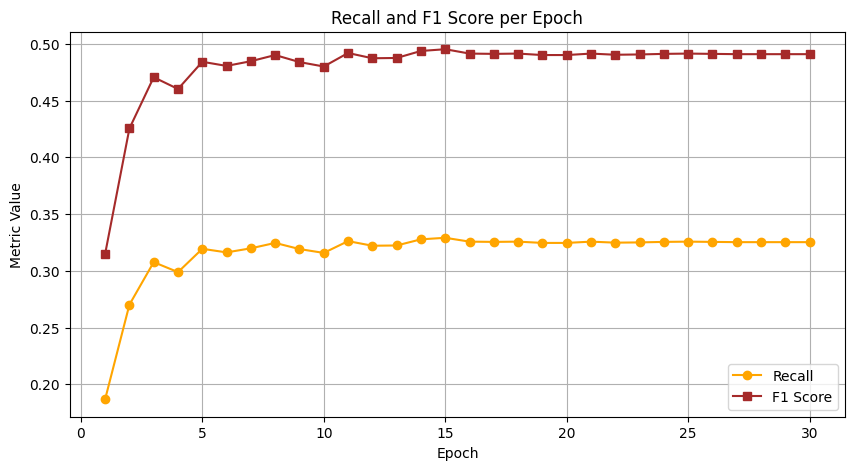

In [11]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tensorboardX import SummaryWriter
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

# sklearn metrics
from sklearn.metrics import recall_score, f1_score

################################################################################
# 3. PyTorch Dataset
################################################################################
class RatingDataset(Dataset):
    def __init__(self, dataframe):
        self.user = dataframe['user_id'].values
        self.item = dataframe['movie_id'].values
        self.label = dataframe['rating'].values

    def __len__(self):
        return len(self.user)

    def __getitem__(self, idx):
        u = torch.tensor(self.user[idx], dtype=torch.long)
        i = torch.tensor(self.item[idx], dtype=torch.long)
        l = torch.tensor(self.label[idx], dtype=torch.float32)
        return u, i, l

# 학습 / 테스트용 Dataset & DataLoader
train_dataset = RatingDataset(df)
test_dataset = RatingDataset(df2)

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

################################################################################
# 4. NCF 모델 정의
################################################################################
class NCF(nn.Module):
    def __init__(self, num_users, num_items, embed_dim=16):
        super(NCF, self).__init__()
        self.embed_dim = embed_dim
        self.dropout = nn.Dropout(p=0.1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        self.embedding_user = nn.Embedding(num_embeddings=num_users, embedding_dim=self.embed_dim)
        self.embedding_item = nn.Embedding(num_embeddings=num_items, embedding_dim=self.embed_dim)

        self.fc1 = nn.Linear(self.embed_dim*2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 4)
        self.fc4 = nn.Linear(4, 1)

        self.apply(self._init_weights)

    def forward(self, user_indices, item_indices):
        user_embedding = self.embedding_user(user_indices)
        item_embedding = self.embedding_item(item_indices)
        vector = torch.cat([user_embedding, item_embedding], dim=-1)

        x = self.fc1(vector)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        out = self.sigmoid(x)
        return out.squeeze()

    def _init_weights(self, module):
        if isinstance(module, nn.Linear) or isinstance(module, nn.Embedding):
            nn.init.xavier_uniform_(module.weight)
            if isinstance(module, nn.Linear) and module.bias is not None:
                nn.init.zeros_(module.bias)

################################################################################
# 5. 학습 설정
################################################################################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NCF(num_users, num_items, embed_dim=8).to(device)

learning_rate = 0.0005
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=1, verbose=True)

################################################################################
# 6. 학습 루프 및 성능 시각화
################################################################################
writer = SummaryWriter()
top_k = 10
num_epochs = 30
best_metric = 0
early_stop_counter = 0

recall_history = []
f1_history = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for user, item, label in tqdm(train_dataloader, desc=f"Epoch {epoch+1}"):
        user, item, label = user.to(device), item.to(device), label.to(device)
        optimizer.zero_grad()
        loss = loss_fn(model(user, item), label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_dataloader)
    scheduler.step(avg_loss)

    # 평가
    model.eval()
    preds_all = []
    labels_all = []
    with torch.no_grad():
        for user, item, label in test_dataloader:
            user, item, label = user.to(device), item.to(device), label.to(device)
            preds = model(user, item)
            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(label.cpu().numpy())

    bin_preds = (np.array(preds_all) >= 0.5).astype(int)
    recall = recall_score(labels_all, bin_preds, zero_division=0)
    f1 = f1_score(labels_all, bin_preds, zero_division=0)
    recall_history.append(recall)
    f1_history.append(f1)

    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f} | Recall: {recall:.4f}, F1: {f1:.4f}")

    if early_stop_counter >= 5:
        print("Early stopping triggered.")
        break

writer.close()

# 성능 시각화
epochs = range(1, len(recall_history) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, recall_history, marker='o', label="Recall", color='orange')
plt.plot(epochs, f1_history, marker='s', label="F1 Score", color='brown')
plt.title("Recall and F1 Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ────────────────────────────────────────────── #
# 8. Inverse Mapping (원래 ID 복원)
# ────────────────────────────────────────────── #
inv_user_id_map = {v: k for k, v in user_id_map.items()}
inv_movie_id_map = {v: k for k, v in movie_id_map.items()}
# ────────────────────────────────────────────── #
# 9. Best Model을 사용한 Top-10 추천 리스트 도출
# ────────────────────────────────────────────── #
# test 데이터에서 유효한 (user_id >= 0) 사용자 목록 추출
unique_users_test = df2[df2['user_id'] >= 0]['user_id'].unique()

recommendations = []  # 각 사용자별 추천 결과 저장

for user in unique_users_test:
    # 학습 데이터(df)에서 해당 사용자가 이미 본 영화(내부 index)를 추출
    seen_items = df[df['user_id'] == user]['movie_id'].unique().tolist()
    # 후보 집합: 전체 영화 중 이미 본 영화는 제외
    candidate_movies = list(set(range(num_items)) - set(seen_items))
    if len(candidate_movies) == 0:
        continue

    # 사용자에 대해 모든 후보 영화에 대한 예측 수행
    user_tensor = torch.tensor([user] * len(candidate_movies), dtype=torch.long).to(device)
    item_tensor = torch.tensor(candidate_movies, dtype=torch.long).to(device)

    with torch.no_grad():
        scores = model(user_tensor, item_tensor).cpu().numpy()

    # 예측 확률 기준 내림차순 정렬하여 상위 10개 인덱스 추출
    top10_indices = np.argsort(-scores)[:10]
    top10_movie_indices = [candidate_movies[i] for i in top10_indices]

    # 원래 movie_id로 변환
    top10_original_ids = [inv_movie_id_map[m] for m in top10_movie_indices]
    user_original_id = inv_user_id_map[user]

    recommendations.append({
        'user_id': user_original_id,
        'top10_movies': top10_original_ids
    })

# DataFrame으로 변환하여 확인
recommendation_df = pd.DataFrame(recommendations)
print("추천 결과 (Top-10):")
print(recommendation_df.head())

# ────────────────────────────────────────────── #
# 10. 각 사용자별로 테스트 아이템에 대한 Hit 여부 및 추천 순위 출력
# ────────────────────────────────────────────── #
results = []
# unique_users_test는 내부 인덱스 값이므로, inv_user_id_map로 원래 ID를 복원합니다.
for user in unique_users_test:
    user_original_id = inv_user_id_map[user]
    # 테스트 데이터에서 해당 사용자의 모든 test movie(내부 index) 추출
    test_items_internal = df2[df2['user_id'] == user]['movie_id'].unique()

    # 추천 리스트에서 해당 사용자에 대한 결과 찾기
    rec_entry = next((r for r in recommendations if r['user_id'] == user_original_id), None)
    if rec_entry is None:
        continue
    top10_recs = rec_entry['top10_movies']  # 원래 movie_id 목록 (추천 순서대로)

    # 각 테스트 아이템에 대해 추천 리스트 내 순위 확인
    for test_item_internal in test_items_internal:
        test_item_original = inv_movie_id_map[test_item_internal]
        if test_item_original in top10_recs:
            rank = top10_recs.index(test_item_original) + 1  # 1-indexed 순위
            hit_flag = "Hit"
        else:
            rank = "X"
            hit_flag = "Miss"
        results.append({
            'user_id': user_original_id,
            'test_item': test_item_original,
            'hit_status': hit_flag,
            'rank': rank,
            'top10_recommendations': top10_recs
        })

result_df2 = pd.DataFrame(results)
print("\n테스트 아이템에 대한 Hit 여부 및 추천 순위:")

추천 결과 (Top-10):
   user_id                                       top10_movies
0        1  [1265, 356, 2858, 2396, 2291, 3751, 357, 1282,...
1        2  [608, 1580, 1, 296, 527, 1617, 1136, 2716, 924...
2        5  [2396, 223, 527, 589, 3481, 3160, 2336, 3052, ...
3        6  [539, 1265, 2671, 597, 357, 356, 2724, 339, 17...
4        8  [2997, 3408, 1617, 3578, 3897, 3948, 1912, 289...

테스트 아이템에 대한 Hit 여부 및 추천 순위:


In [ ]:
result_df2[result_df2["hit_status"]=="Hit"]

,user_id,test_item,hit_status,rank,top10_recommendations
3,6,597,Hit,4,"[539, 1265, 2671, 597, 357, 356, 2724, 339, 17..."
24,35,910,Hit,3,"[1265, 1244, 910, 2067, 1394, 3072, 2997, 1961..."
37,56,2321,Hit,10,"[3408, 337, 356, 2291, 1747, 1639, 3897, 2716,..."
48,70,3081,Hit,2,"[3160, 3081, 2712, 3481, 1617, 3535, 2028, 290..."
52,76,3408,Hit,10,"[32, 2997, 2908, 2010, 3481, 1748, 1175, 223, ..."
...,...,...,...,...,...
4328,5903,1617,Hit,3,"[608, 296, 1617, 1198, 3578, 2396, 2997, 2716,..."
4340,5920,1962,Hit,7,"[3448, 2174, 110, 3608, 1291, 1136, 1962, 3421..."
4346,5927,3897,Hit,2,"[1617, 3897, 3160, 223, 2248, 2716, 2959, 1, 2..."
4358,5949,3897,Hit,2,"[3174, 3897, 1912, 1265, 2291, 2605, 2490, 172..."


## **LAST NeuMF model**

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tensorboardX import SummaryWriter
from tqdm import tqdm
import time

################################################################################
# 1. 사용자/아이템 인덱스 매핑
################################################################################
user_id_map = {id_: idx for idx, id_ in enumerate(df['user_id'].unique())}
movie_id_map = {id_: idx for idx, id_ in enumerate(df['movie_id'].unique())}

df['user_id'] = df['user_id'].map(user_id_map)
df['movie_id'] = df['movie_id'].map(movie_id_map)

# test 데이터도 동일하게 매핑; 없으면 -1 처리
df2['user_id'] = df2['user_id'].map(user_id_map).fillna(-1).astype(int)
df2['movie_id'] = df2['movie_id'].map(movie_id_map).fillna(-1).astype(int)

################################################################################
# 2. 사용자/아이템 개수 설정
################################################################################
num_users = df['user_id'].max() + 1
num_items = df['movie_id'].max() + 1

################################################################################
# 3. PyTorch Dataset
################################################################################
class RatingDataset(Dataset):
    def __init__(self, dataframe):
        self.user = dataframe['user_id'].values
        self.item = dataframe['movie_id'].values
        self.label = dataframe['rating'].values

    def __len__(self):
        return len(self.user)

    def __getitem__(self, idx):
        u = torch.tensor(self.user[idx], dtype=torch.long)
        i = torch.tensor(self.item[idx], dtype=torch.long)
        l = torch.tensor(self.label[idx], dtype=torch.float32)  # Binary Cross Entropy Loss 위해 float 변환
        return u, i, l

# 학습 / 테스트용 Dataset & DataLoader
train_dataset = RatingDataset(df)
test_dataset = RatingDataset(df2)

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
#test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False)
# 위 test_dataloader는 여기 코드상 사용하지 않지만, 필요하다면 활용

################################################################################
# 4. NCF 모델 정의
################################################################################
import torch
import torch.nn as nn

class NeuMF(nn.Module):
    def __init__(self, num_users, num_items, embed_dim=32, hidden_layers=[64,32, 16]):
        super(NeuMF, self).__init__()

        self.dropout = nn.Dropout(p=0.1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        # GMF 임베딩
        self.user_embedding_gmf = nn.Embedding(num_users, embed_dim)
        self.item_embedding_gmf = nn.Embedding(num_items, embed_dim)

        # MLP 임베딩
        self.user_embedding_mlp = nn.Embedding(num_users, embed_dim)
        self.item_embedding_mlp = nn.Embedding(num_items, embed_dim)

        # MLP Layers
        layers = []
        input_dim = embed_dim * 2  # 사용자 + 아이템 임베딩 결합
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            input_dim = hidden_dim
        self.mlp_layers = nn.Sequential(*layers)

        # GMF Layer (Hadamard Product)
        self.gmf_fc = nn.Linear(embed_dim, 1)

        # NeuMF Layer (GMF + MLP Concatenation)
        self.final_fc = nn.Linear(embed_dim + hidden_layers[-1], 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, user_indices, item_indices):
        # GMF Forward
        gmf_user_emb = self.user_embedding_gmf(user_indices)
        gmf_item_emb = self.item_embedding_gmf(item_indices)
        gmf_output = gmf_user_emb * gmf_item_emb  # Hadamard Product

        # MLP Forward
        mlp_user_emb = self.user_embedding_mlp(user_indices)
        mlp_item_emb = self.item_embedding_mlp(item_indices)
        mlp_input = torch.cat([mlp_user_emb, mlp_item_emb], dim=-1)  # Concatenation
        mlp_output = self.mlp_layers(mlp_input)

        # NeuMF Layer (Concatenation of GMF and MLP outputs)
        final_input = torch.cat([gmf_output, mlp_output], dim=-1)
        out = self.final_fc(final_input)
        return self.sigmoid(out).squeeze()


################################################################################
# 5. 학습 설정
################################################################################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuMF(num_users, num_items, embed_dim=16).to(device)
loss_fn = nn.BCELoss()

################################################################################
# 6. Negative Sampling & 평가 지표(HR, NDCG)
################################################################################
def get_negative_samples(user_id, all_item_ids, seen_item_ids, num_neg=99):
    """사용자가 본 적 없는 아이템 중 num_neg개 추출"""
    candidates = list(set(all_item_ids) - set(seen_item_ids))
    if len(candidates) < num_neg:
        # 후보가 부족하면 가능한 만큼만 뽑거나, 필요 시 skip할 수도 있음
        num_neg = len(candidates)
    if num_neg == 0:
        return []
    return np.random.choice(candidates, num_neg, replace=False)

def hit(gt_item, pred_items):
    return 1 if gt_item in pred_items else 0

def ndcg(gt_item, pred_items):
    """pred_items 내에서 gt_item의 순위가 얼마나 높은지"""
    if gt_item in pred_items:
        index = pred_items.index(gt_item)
        return 1 / np.log2(index + 2)
    return 0

def metrics(model, test_data, all_item_ids, top_k=10):
    """ test_data를 순회하며 HR@K, NDCG@K 계산 """
    model.eval()
    HR_list, NDCG_list = [], []

    # -1인 (미존재) 유저나 아이템 제외
    valid_test = test_data[(test_data['user_id'] >= 0) & (test_data['movie_id'] >= 0)]

    with torch.no_grad():
        for row in valid_test.itertuples():
            user_id = row.user_id
            gt_item = row.movie_id

            # 사용자가 train에서 이미 본 아이템 목록
            seen_item_ids = df[df['user_id'] == user_id]['movie_id'].unique().tolist()

            # Negative 샘플 99개 추출
            neg_samples = get_negative_samples(
                user_id,
                all_item_ids,
                seen_item_ids,
                num_neg=99
            )
            # 만약 neg_samples가 비어있다면 스킵
            if len(neg_samples) == 0:
                continue

            items_to_eval = [gt_item] + list(neg_samples)

            # 모델 예측
            user_tensor = torch.tensor([user_id]*len(items_to_eval), dtype=torch.long).to(device)
            item_tensor = torch.tensor(items_to_eval, dtype=torch.long).to(device)
            scores = model(user_tensor, item_tensor).cpu().numpy()

            # 스코어 내림차순 정렬
            sort_indices = np.argsort(-scores)
            ranked_items = [items_to_eval[i] for i in sort_indices]

            # 상위 K개 안에 ground truth가 있는지
            HR_list.append(hit(gt_item, ranked_items[:top_k]))
            # NDCG는 전체 순위에서의 위치로 계산 (원하는 경우 top_k 내에서만 계산 가능)
            NDCG_list.append(ndcg(gt_item, ranked_items[:top_k]))

    hr = np.mean(HR_list) if len(HR_list) > 0 else 0
    ndcg_val = np.mean(NDCG_list) if len(NDCG_list) > 0 else 0
    return hr, ndcg_val

################################################################################
# 7. 학습 루프 + 텐서보드 기록 (예시)
################################################################################
writer = SummaryWriter()
all_item_ids = df['movie_id'].unique()
top_k = 10
best_hr = 0

import matplotlib.pyplot as plt

# 에포크마다 기록할 리스트 초기화
loss_history = []
hr_history = []
ndcg_history = []

best_hr = 0

# 옵티마이저 및 스케줄러 설정
learning_rate = 0.001  # 기존 0.0005에서 증가
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0.00001)  # 🔥 스케줄러 추가

for epoch in range(20):
    model.train()
    start_time = time.time()
    total_loss = 0

    for user, item, label in tqdm(train_dataloader, desc=f"Epoch {epoch+1}"):
        user = user.to(device)
        item = item.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        preds = model(user, item)
        loss = loss_fn(preds, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # 스케줄러 업데이트 🔥
    scheduler.step()

    # 에포크마다 평균 loss 계산 및 기록
    avg_loss = total_loss / len(train_dataloader)
    loss_history.append(avg_loss)

    # 한 에포크 끝나면 평가
    hr, ndcg_val = metrics(model, df2, all_item_ids, top_k=top_k)
    hr_history.append(hr)
    ndcg_history.append(ndcg_val)

    epoch_time = time.time() - start_time

    # 텐서보드 기록 (원하는 경우)
    writer.add_scalar("Loss/train", avg_loss, epoch)
    writer.add_scalar("HR/test", hr, epoch)
    writer.add_scalar("NDCG/test", ndcg_val, epoch)
    writer.add_scalar("LR", scheduler.get_last_lr()[0], epoch)  # 🔥 현재 학습률 기록

    print(f"[Epoch {epoch+1}] Loss: {avg_loss:.4f} | "
          f"HR@{top_k}: {hr:.4f}, NDCG@{top_k}: {ndcg_val:.4f} | "
          f"LR: {scheduler.get_last_lr()[0]:.6f} | "  # 🔥 현재 학습률 출력
          f"Elapsed: {time.strftime('%H:%M:%S', time.gmtime(epoch_time))}")

    # 베스트 모델 갱신
    if hr > best_hr:
        best_hr = hr
        best_ndcg = ndcg_val
        best_epoch = epoch

writer.close()
print(f"Training complete. Best epoch = {best_epoch+1} | HR = {best_hr:.4f}, NDCG = {best_ndcg:.4f}")


# 시각화
epochs = range(1, len(loss_history) + 1)

plt.figure(figsize=(14, 5))

# 1) Train Loss 그래프 (왼쪽)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_history, marker='o', color='blue')
plt.title("Train Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# 2) HR & NDCG 그래프 (오른쪽)
plt.subplot(1, 2, 2)
plt.plot(epochs, hr_history, marker='o', label="Hit Ratio", color='green')
plt.plot(epochs, ndcg_history, marker='s', label="NDCG", color='red')
plt.title("HR and NDCG per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()